# `Analysis of Variance (ANOVA) ------------------------`

* ANOVA is used to compare the means of three or more samples.

* While you could do multiple T-tests, as you increase the numbers of T-tests you do, you are more likely to encounter a Type I error. If you have a p value of 0.05 for each T-test, once you have run three T-tests, your p is effectively 0.143. ANOVA controls for this error such that the Type I error rate remains at 5%.

```An ANOVA will provide an F-statistic which can, along with degrees of freedom, be used to calculate a p value.```

* ANOVAs assume independence of observations, homogeneity of variances and normally distributed observations within groups.

* This is implemented in scipy by as f_oneway().

### Example

We will use RO Data Set for our ANOVA.

The null hypothesis is that there is no difference between the means

In [5]:
trt0 = [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14]
trt1 = [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69]
trt2 = [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]

In [6]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Density'>

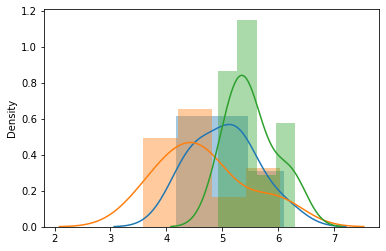

In [7]:
sns.distplot(trt0)
sns.distplot(trt1)
sns.distplot(trt2)

In [8]:
from scipy.stats import f_oneway

f_oneway(trt0,trt1,trt2)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

- So we report the result of our ANOVA as (F(2, 27), p=0.016).
- **As p < 0.05, we can reject the null hypothesis**

# `Correlation ------------------------`

Correlation is a measure of linear correlation between two sets of data. It is the covariance of two variables, divided by the product of their standard deviations;

![image](http://zerodha.com/varsity/wp-content/uploads/2017/04/Correlation-Formula.png)

![image](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module9-Correlation-Regression/Correlation%20Coefficient%20examples.png)

In [9]:
import numpy as np

weights = np.random.normal(60,25,1000)
height = weights + 100 + np.random.normal(0.5,10,1000)

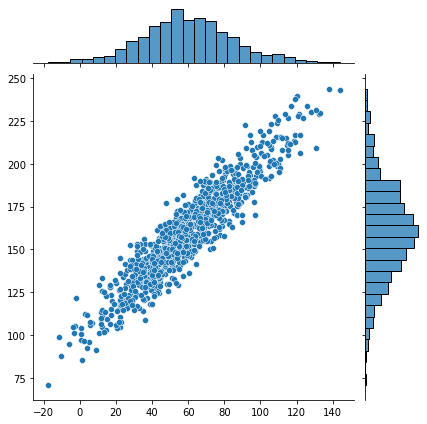

In [10]:
sns.jointplot(weights,height)

In [11]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(weights,height)

In [12]:
correlation # linear increasing -> its close to one

0.9317929161938534

In [13]:
p_value

0.0

# `Chisquare test ------------------------`

- $H_0 - Null Hypothesis(CLAIM)$  - Variable are independent (They are not related)
- $H_A - Alternate Hypothesis(Contradiction)$ - variable are dependent (They are related)

![image](https://sites.google.com/site/skillsa229/_/rsrc/1327153749666/chi-squared/chisqu.gif)

In [14]:
import pandas as pd
data = pd.read_csv("Social_Network_Ads.csv")

In [16]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [17]:
two_fre_table = pd.crosstab(data["Gender"],data["Purchased"])
two_fre_table

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [19]:
from scipy.stats import chi2_contingency

x2_value , p_value, df, expected_values = chi2_contingency(two_fre_table)

In [20]:
p_value # p > 0.05 I will accepted the null hypothesis

0.45624659183130645

In [21]:
df

1

In [26]:
x2_value

0.5550869364098915

In [27]:
expected_values

array([[131.07,  72.93],
       [125.93,  70.07]])

# `END -----------------------------------------------`